In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

Test 1
GRU ->
Linear -> 
Sigmoid


In [2]:
#to plot loss over time 

import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [3]:
tweets = list()
targets = list()

with open('preprocessing_scripts/new_train_data.txt', 'r') as f:
  tweets = f.readlines()
print(len(tweets))

with open('preprocessing_scripts/targets.csv', 'r') as f:
  targets = f.readlines()
targets2 = list()
for i in range(0, len(targets)): 
    targets2.append(int(targets[i]))
targets = targets2

7613


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 14000
tokenizer = Tokenizer(num_words=max_words)


In [5]:
trainX = tweets[:6000]
trainY = targets[:6000]

testX = tweets[6000:]
testY = tweets[6000:]

maxlen = 100

from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer.fit_on_texts(trainX)
tokenized_version = tokenizer.texts_to_sequences(trainX)
tokenized_version = pad_sequences(tokenized_version, maxlen=maxlen)
print(tokenized_version)

[[   0    0    0 ...  165   58    1]
 [   0    0    0 ...   84   15    1]
 [   0    0    0 ...   33 1064    1]
 ...
 [   0    0    0 ...   10 2164    1]
 [   0    0    0 ...    8  682    1]
 [   0    0    0 ...  866 3316    1]]


In [6]:
vocab_size = 14000
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
es = EarlyStopping(patience=5)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy']) 

In [7]:
import numpy as np
trainY = np.array(trainY)

history = model.fit(x=tokenized_version, y=trainY, batch_size = 32, epochs=10, validation_split = 0.2,callbacks=[es])

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 37s 8ms/sample - loss: 0.5589 - accuracy: 0.7146 - val_loss: 0.5663 - val_accuracy: 0.7167

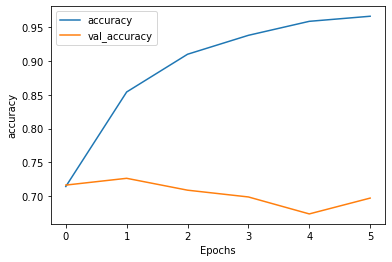

In [8]:
plot_graphs(history,"accuracy")

